# Wallis' formula for $\pi$

Wallis' formula is a slowly converging infinite product that approximates pi as

$$
   \pi = \lim_{n \rightarrow \infty} 2 \prod_{i=1}^{n}\frac{4i^2}{4i^2-1}.
$$

While this isn't a particularly good way of computing $\pi$ from a numerical
standpoint, it provides for an excellent illustration of how Python's integers
are more flexible and powerful than those typically found by default in
compiled languages like C and Fortran.  The problem is that for
this formula to be even remotely accurate, one must evaluate it for fairly
large values of $n$, where both the numerator and the denominator will easily
overflow the limits of 64-bit integers.  It is only after taking the ratio of
these two huge numbers that the value is small (close to $\pi$).

Fortunately for us, Python integers automatically allocate as many digits as
necessary (within the limits of physically available memory) to hold their
result.  So while impementing the above in C or Fortran (without auxilary
libraries like [GMP](http://gmplib.org)) would be fairly tricky, in Python it's very
straightforward.

For this exercise, write a program that implements the above formula.  Note
that Python's `math` module already contains $\pi$ in double precision, so
you can use this value to compare your results:

In [1]:
import math
math.pi

3.141592653589793

# Solution

Note that in the computation of $\pi$, you must store the numerator and the denominator *separately* as integers, to take advantage of Python's arbitrary length integers, and only make the floating point division at the very end.

In [9]:
def w_pi(n):
    """Compute pi using n terms of Wallis' product.

    Wallis' formula approximates pi as

    pi(n) = 2 \prod_{i=1}^{n}\frac{4i^2}{4i^2-1}."""

    num = 1
    den = 1
    for i in range(1,n+1):
        tmp = 4*i*i
        num *= tmp
        den *= tmp-1
    return 2.0*(num/den)

A quick test:

In [10]:
w_pi(1000)

3.1408077460303945

And now a plot of the results:

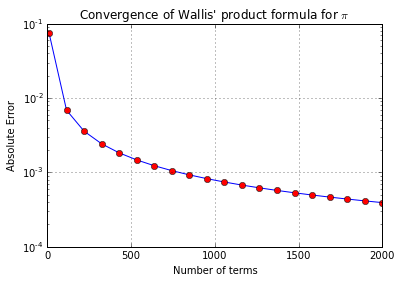

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create a list of points 'nrange' where we'll compute Wallis' formula
nrange = np.linspace(10,2000,20).astype(int)
# Make an array of such values
wpi = np.array(list(map(w_pi, nrange)))

# Compute the difference against the value of pi in numpy (standard
# 16-digit value)
diff = abs(wpi-np.pi)

# Build a semilog plot of the difference so we can see the quality
# of the convergence
# Line plot with red circles at the data points
plt.semilogy(nrange,diff,'-o',mfc='red')

# A bit of labeling and a grid
plt.title(r"Convergence of Wallis' product formula for $\pi$")
plt.xlabel('Number of terms')
plt.ylabel('Absolute Error')
plt.grid()